In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step 2: Load the dataset
from google.colab import files
uploaded = files.upload()
# Read the CSV file
df = pd.read_csv('technical_skills_Job_roles_dataset.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")


Saving technical_skills_Job_roles_dataset.csv to technical_skills_Job_roles_dataset (1).csv
Dataset loaded successfully!
Dataset shape: (12000, 3)


In [ ]:
# Step 3: Initial data exploration
print("\n=== Step 3: Initial Data Exploration ===")
print("\nFirst 5 rows:")
print(df.head(12))


=== Step 3: Initial Data Exploration ===

First 5 rows:
                    Technical_Skills                Educational_Qualification  \
0   Photoshop, Illustrator, InDesign               B.Tech in Computer Science   
1          Risk Management, Auditing                     M.Sc in Data Science   
2            HVAC Design, Revit, BIM                      B.Pharm in Pharmacy   
3   Photoshop, Illustrator, InDesign                               LLB in Law   
4         Medical Imaging, Radiology                               LLB in Law   
5       Legal Research, Contract Law                       B.A. in Psychology   
6         Medical Imaging, Radiology          M.Com in Accounting and Finance   
7          Risk Management, Auditing         M.Tech in Electrical Engineering   
8          Patient Care, Diagnostics  B.Tech in Electronics and Communication   
9        Curriculum Design, Pedagogy                  B.Des in Graphic Design   
10                 AutoCAD, Civil 3D             MCA

In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Technical_Skills           12000 non-null  object
 1   Educational_Qualification  12000 non-null  object
 2   Job_Role                   12000 non-null  object
dtypes: object(3)
memory usage: 281.4+ KB
None


In [ ]:
print("\nBasic Statistics:")
print(df.describe(include='all'))
print("\nColumn names:")
print(df.columns.tolist())


Basic Statistics:
                        Technical_Skills Educational_Qualification  \
count                              12000                     12000   
unique                                48                        19   
top     Clinical Research, Data Analysis       B.Sc in Agriculture   
freq                                 327                       668   

                  Job_Role  
count                12000  
unique                  47  
top     Medical Researcher  
freq                   334  

Column names:
['Technical_Skills', 'Educational_Qualification', 'Job_Role']


In [ ]:
# Step 4: Check for missing values
print("\n=== Step 4: Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)


=== Step 4: Missing Values Analysis ===
                           Missing Values  Percentage
Technical_Skills                        0         0.0
Educational_Qualification               0         0.0
Job_Role                                0         0.0


In [ ]:
# 🧹 Step 5: Remove exact duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
df = df.drop_duplicates().reset_index(drop=True)
print("After removing duplicates:", df.shape)


Duplicate rows found: 8108
After removing duplicates: (3892, 3)


In [ ]:
# step 6 ✅ Synthesization more rows
from tqdm import tqdm
import random
# 🔍 Detect likely column names automatically
obj_cols = df.select_dtypes(include='object').columns.tolist()

skill_col = None
edu_col = None
target_col = None

for c in obj_cols:
    name = c.lower()
    if 'skill' in name:
        skill_col = c
    elif 'educ' in name or 'qual' in name:
        edu_col = c
    elif 'job' in name or 'role' in name:
        target_col = c

print(f"Detected columns → Education: {edu_col}, Skills: {skill_col}, Job Role: {target_col}")

# 🎓 Additional realistic education values
additional_educational_qualifications = [
    "B.Tech in Mechanical Engineering","B.Tech in Civil Engineering",
    "B.Tech in Electrical Engineering","B.Tech in Chemical Engineering",
    "B.Arch in Architecture","B.Sc in Computer Science","B.Sc in Physics",
    "B.Sc in Chemistry","B.Sc in Mathematics","B.Com in Commerce",
    "B.A. in English Literature","B.A. in Economics","B.Sc in Psychology",
    "MBBS in Medicine","BDS in Dentistry","B.Pharm in Pharmacy",
    "B.Sc in Nursing","B.Ed in Education","LLB in Law","BFA in Fine Arts",
    "M.Tech in Artificial Intelligence","M.Tech in Data Science","M.Tech in Robotics",
    "MBA in Marketing","MBA in HR Management","MBA in Finance",
    "M.Sc in Environmental Science","M.Sc in Statistics","MCA in Software Engineering",
    "Ph.D in Biotechnology","Ph.D in Computer Vision","Diploma in Graphic Design",
    "Diploma in Networking","Diploma in Cloud Computing"
]

# 🧠 Additional realistic technical skills
additional_technical_skills = [
    "Python, Pandas, NumPy, Scikit-learn","React, Node.js, MongoDB",
    "AWS, Azure, Cloud Computing","TensorFlow, PyTorch, Neural Networks",
    "SAP, Oracle, ERP Systems","Network Security, Firewalls, VPN",
    "Mobile App Development, Flutter, React Native","Big Data, Hadoop, Spark",
    "IoT, Embedded Systems, Arduino","Blockchain, Smart Contracts, Cryptocurrency",
    "Unity, Unreal Engine, Game Development","Quantum Computing, Qiskit",
    "Robotics, Automation, PLC","Biotechnology, Genetic Engineering",
    "Renewable Energy, Solar Systems","Supply Chain Management, Logistics",
    "Human Resources, Talent Acquisition","Public Relations, Corporate Communications",
    "Content Strategy, Copywriting","Project Management, Agile, Scrum",
    "Cybersecurity, Ethical Hacking, Penetration Testing",
    "Data Visualization, Tableau, Power BI","Computer Vision, OpenCV",
    "Natural Language Processing, Transformers","Cloud Security, DevSecOps",
    "Business Intelligence, SQL, Excel","Software Testing, Selenium, Jenkins",
    "Digital Marketing, SEO, Google Ads","UI/UX Design, Figma, Adobe XD",
    "Hardware Design, Circuit Simulation, Microcontrollers"
]

# 💼 Additional realistic job roles
additional_job_roles = [
    "Data Scientist","Machine Learning Engineer","Cloud Architect","Network Engineer",
    "Mobile Developer","Game Developer","Blockchain Developer","Quantum Computing Specialist",
    "Robotics Engineer","Biotech Researcher","Renewable Energy Engineer","Supply Chain Manager",
    "HR Manager","Public Relations Specialist","Content Strategist","Project Manager",
    "Product Manager","Systems Administrator","Database Administrator","Technical Writer",
    "AI Research Engineer","Cybersecurity Consultant","DevOps Engineer","Mechanical Design Engineer",
    "Environmental Analyst","UX Researcher","Automation Tester","AR/VR Developer",
    "Financial Risk Analyst","Genetic Data Analyst","Cloud Security Engineer","Software Architect",
    "Frontend Developer","Backend Developer","Electrical Maintenance Engineer",
    "Biomedical Data Analyst","Energy Systems Consultant","Marketing Data Analyst",
    "Operations Analyst","Network Security Analyst","Game Designer"
]

# 🧩 Generate ~3000 realistic rows
new_rows = []
for _ in tqdm(range(3000)):
    edu = random.choice(additional_educational_qualifications)
    skill = random.choice(additional_technical_skills)
    role = random.choice(additional_job_roles)
    new_rows.append({edu_col: edu, skill_col: skill, target_col: role})

new_df = pd.DataFrame(new_rows)

# 🔄 Combine and remove duplicates
df = pd.concat([df, new_df], ignore_index=True)
df = df.drop_duplicates(subset=[edu_col, skill_col, target_col]).reset_index(drop=True)

print("✅ Final dataset shape after adding 3000 rows:", df.shape)

# 💾 Save back to same uploaded file path
# Change this path if you mounted Google Drive or uploaded via Colab upload
path = '/content/technical_skills_Job_roles_dataset.csv'  # update path to your file
df.to_csv(path, index=False)

print(f"✅ Updated dataset saved to same file: {path}")


Detected columns → Education: Educational_Qualification, Skills: Technical_Skills, Job Role: Job_Role


100%|██████████| 3000/3000 [00:00<00:00, 238633.62it/s]

✅ Final dataset shape after adding 3000 rows: (6782, 3)
✅ Updated dataset saved to same file: /content/technical_skills_Job_roles_dataset.csv


In [ ]:
# step 🔍 Check duplicates
duplicates = df.duplicated().sum()
print(f"Total duplicate rows found: {duplicates}")
print

Total duplicate rows found: 0


In [ ]:
# 🔍 Detect columns automatically
obj_cols = df.select_dtypes(include='object').columns.tolist()

skill_col = None
edu_col = None
target_col = None

for c in obj_cols:
    name = c.lower()
    if 'skill' in name:
        skill_col = c
    elif 'educ' in name or 'qual' in name:
        edu_col = c
    elif 'job' in name or 'role' in name:
        target_col = c

print(f"Detected columns → Education: {edu_col}, Skills: {skill_col}, Job Role: {target_col}")

# 🧹 Clean text (lowercase, remove spaces)
for col in [edu_col, skill_col, target_col]:
    df[col] = df[col].astype(str).str.lower().str.strip()


Detected columns → Education: Educational_Qualification, Skills: Technical_Skills, Job Role: Job_Role


In [ ]:
# ==============================================
# 📘 One-Hot Encoding on Dataset (Google Colab)
# ==============================================

from sklearn.preprocessing import OneHotEncoder

print("✅ Original Dataset Shape:", df.shape)
print("\n🔹 Original Data (first 5 rows):")
print(df.head())

# 3️⃣ Detect categorical columns automatically
cat_cols = df.select_dtypes(include=['object']).columns
print("\n🧩 Categorical Columns:", list(cat_cols))

# 4️⃣ Apply One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df[cat_cols])

# Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# 5️⃣ Combine with numerical columns
num_df = df.drop(columns=cat_cols).reset_index(drop=True)
final_df = pd.concat([num_df, encoded_df], axis=1)

# 6️⃣ Print results
print("\n✅ Encoded Dataset Shape:", final_df.shape)
print("\n🔹 Encoded Data (first 5 rows):")
print(final_df.head())

# 7️⃣ (Optional) Save encoded dataset
final_df.to_csv('/content/onehot_encoded_dataset.csv', index=False)
print("\n💾 Saved as 'onehot_encoded_dataset.csv'")


✅ Original Dataset Shape: (6782, 3)

🔹 Original Data (first 5 rows):
                   Technical_Skills   Educational_Qualification  \
0  photoshop, illustrator, indesign  b.tech in computer science   
1         risk management, auditing        m.sc in data science   
2           hvac design, revit, bim         b.pharm in pharmacy   
3  photoshop, illustrator, indesign                  llb in law   
4        medical imaging, radiology                  llb in law   

              Job_Role  
0     graphic designer  
1     business analyst  
2  mechanical engineer  
3     graphic designer  
4       lab technician  

🧩 Categorical Columns: ['Technical_Skills', 'Educational_Qualification', 'Job_Role']

✅ Encoded Dataset Shape: (6782, 210)

🔹 Encoded Data (first 5 rows):
   Technical_Skills_3d modelling, blender, maya  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                 

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer



# Function to split comma-separated values into lists
def split_multilabel(column):
    return column.str.split(',')

# Columns to encode
columns_to_encode = ['Technical_Skills', 'Educational_Qualification', 'Job_Role']

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# List to store encoded dataframes
encoded_dfs = []

for col in columns_to_encode:
    # Split multi-label values
    splitted = split_multilabel(df[col])
    # Encode using MultiLabelBinarizer
    encoded = pd.DataFrame(mlb.fit_transform(splitted),
                           columns=[f"{col}_{cls}" for cls in mlb.classes_])
    encoded_dfs.append(encoded)

# Combine all encoded columns
df_encoded = pd.concat(encoded_dfs, axis=1)

# Save to new CSV file
df_encoded.to_csv("encoded_dataset.csv", index=False)

print("Encoded dataset saved as 'encoded_dataset.csv'")


Encoded dataset saved as 'encoded_dataset.csv'


Saving technical_skills_Job_roles_dataset.csv to technical_skills_Job_roles_dataset.csv
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Technical_Skills           6782 non-null   object
 1   Educational_Qualification  6782 non-null   object
 2   Job_Role                   6782 non-null   object
dtypes: object(3)
memory usage: 159.1+ KB
None

First 5 Rows:

                   Technical_Skills   Educational_Qualification  \
0  Photoshop, Illustrator, InDesign  B.Tech in Computer Science   
1         Risk Management, Auditing        M.Sc in Data Science   
2           HVAC Design, Revit, BIM         B.Pharm in Pharmacy   
3  Photoshop, Illustrator, InDesign                  LLB in Law   
4        Medical Imaging, Radiology                  LLB in Law   

              Job_Role  
0     Graphic Designer  


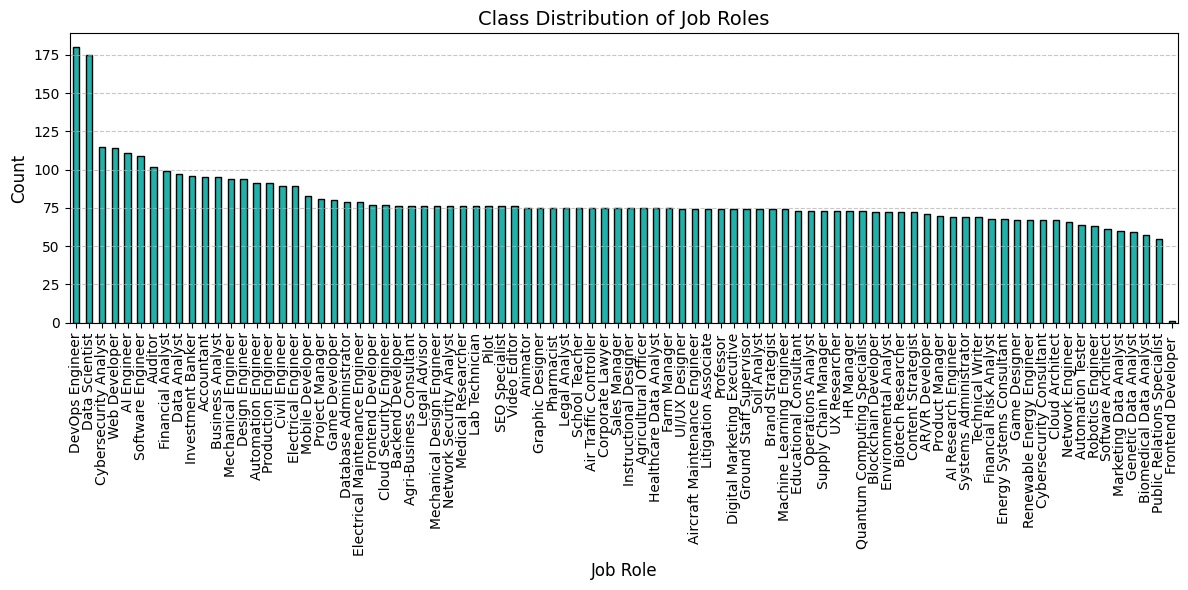


Imbalance Ratio: 180.00 (Higher means more imbalance)


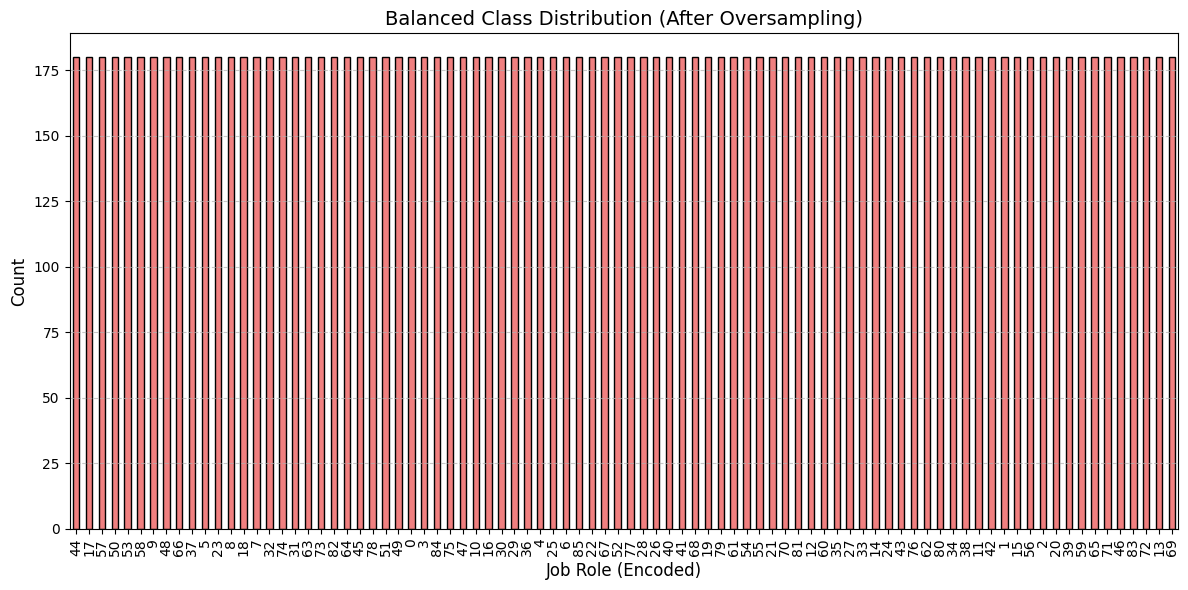


After Oversampling:
Job_Role_Encoded
44    180
17    180
57    180
50    180
53    180
Name: count, dtype: int64

Balanced Job Role Distribution:

                 Job_Role  Count
0        Graphic Designer    180
1        Business Analyst    180
2     Mechanical Engineer    180
3          Lab Technician    180
4    Litigation Associate    180
5      Medical Researcher    180
6                 Auditor    180
7  Instructional Designer    180
8     Production Engineer    180
9       Financial Analyst    180


In [ ]:
# ==============================
# 📘 STEP 1: Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# ==============================
# 📂 STEP 2: Load the Dataset
# ==============================
from google.colab import files
uploaded = files.upload()   # Upload your CSV file

# Replace filename with yours
df = pd.read_csv('technical_skills_Job_roles_dataset.csv')

# Preview the data
print("Dataset Info:\n")
print(df.info())
print("\nFirst 5 Rows:\n")
print(df.head())

# ==============================
# 📊 STEP 3: Analyze Class Distribution
# ==============================
job_role_counts = df['Job_Role'].value_counts()

# Print top 10 job roles
print("\nTop 10 Job Roles:\n", job_role_counts.head(10))

# Plot bar chart
plt.figure(figsize=(12,6))
job_role_counts.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title('Class Distribution of Job Roles', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imbalance ratio
imbalance_ratio = job_role_counts.max() / job_role_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f} (Higher means more imbalance)")

# ==============================
# ⚙️ STEP 4: Optional — Encode Text Columns (for balancing)
# ==============================
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Job_Role_Encoded'] = le.fit_transform(df['Job_Role'])

# ==============================
# 🧩 STEP 5: Split Features and Target
# ==============================
X = df.drop(columns=['Job_Role', 'Job_Role_Encoded'])
y = df['Job_Role_Encoded']

# Convert features to numeric if needed (dummy encoding for example)
X = pd.get_dummies(X)

# ==============================
# ⚖️ STEP 6: Handle Class Imbalance (Random Oversampling)
# ==============================
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# ==============================
# 📈 STEP 7: Visualize Balanced Data
# ==============================
balanced_counts = pd.Series(y_resampled).value_counts()
plt.figure(figsize=(12,6))
balanced_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Balanced Class Distribution (After Oversampling)', fontsize=14)
plt.xlabel('Job Role (Encoded)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nAfter Oversampling:")
print(balanced_counts.head())

# ==============================
# 🧠 STEP 8: Decode Back (Optional)
# ==============================
balanced_roles = le.inverse_transform(balanced_counts.index)
balanced_df = pd.DataFrame({
    'Job_Role': balanced_roles,
    'Count': balanced_counts.values
})
print("\nBalanced Job Role Distribution:\n")
print(balanced_df.head(10))



📊 Samples Added per Job Role (Encoded):

                  Before  After  Samples_Added
Job_Role_Encoded                              
40                     1    180            179
69                    55    180            125
13                    57    180            123
43                    59    180            121
55                    60    180            120
76                    61    180            119
72                    63    180            117
11                    64    180            116
60                    66    180            114
24                    67    180            113


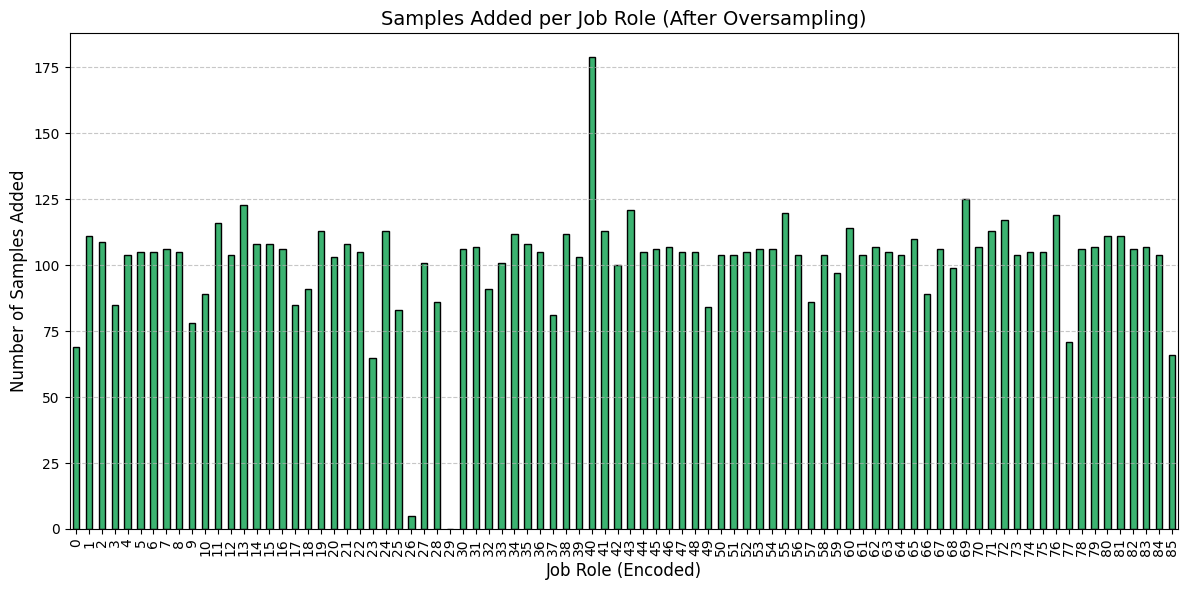

In [ ]:
# ==============================
# 🔍 STEP 6.1: Check Samples Added per Class
# ==============================

# Before oversampling counts
before_counts = y.value_counts()

# After oversampling counts
after_counts = pd.Series(y_resampled).value_counts()

# Calculate samples added per category
samples_added = after_counts - before_counts

# Combine into a single DataFrame for clarity
added_df = pd.DataFrame({
    'Before': before_counts,
    'After': after_counts,
    'Samples_Added': samples_added
}).fillna(0).astype(int)

print("\n📊 Samples Added per Job Role (Encoded):\n")
print(added_df.sort_values('Samples_Added', ascending=False).head(10))

# Optional: visualize
plt.figure(figsize=(12,6))
added_df['Samples_Added'].plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Samples Added per Job Role (After Oversampling)', fontsize=14)
plt.xlabel('Job Role (Encoded)', fontsize=12)
plt.ylabel('Number of Samples Added', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
